# Homework 6: A Systematic Homework on Randomness

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 23    

*Nicholas Pham*


## Problem 1: Drunkard's Walk in One Dimension
This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi.


*Insert your favorite joke about the Thursday night wine and music events.*

What joke? 

The drunkard's walk problem is an example of a **stochastic** system (randomness plays a key role). A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. You then relate this problem to diffusion in a physical system.

### Problem 1a

Code the drunkard's walk for `nSteps=1000` steps. Assume the drunkard starts at the original The result of your code should be an array of positions. It is also useful to keep an array of squared positions, $x^2$. 

Plot the drunkard's walk ($x$ as a function of step number) and the squared displacement ($x^2$ as a function of step number) for a given random seed.

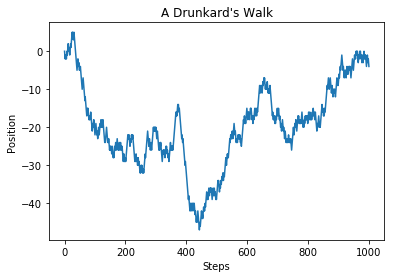

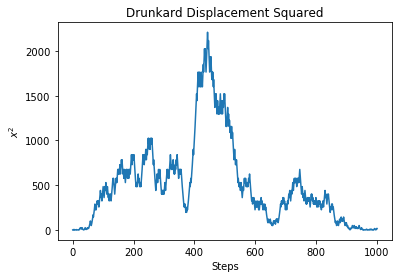

In [22]:
from random import *
from math import floor
import matplotlib.pyplot as plt
import numpy as np

#Global Parameters
nSteps = 1000

def drunkWalker():
    """
    Gives the motion of a single drunk person 
        
    """
    x_0 = 0
    x = x_0
    path = [0]
    for steps in range(nSteps):
        r = floor(2*random())
        if r==0:
            x-=1
        else:
            x+=1
        path.append(x)
    return path

def xsquared(arr):
    """
    This returns your input array squared by elements
    """
    return np.multiply(arr, arr)

##Plotting
drunkPath = drunkWalker()
##Drunken movements
s = np.linspace(0, 1001, 1001) #Create a linspace of steps
plt.figure(1)
plt.title('A Drunkard\'s Walk')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.plot(s,drunkPath)

## Drunken Displacement
Path = xsquared(drunkPath)
plt.figure(2)
plt.title('Drunkard Displacement Squared')
plt.xlabel('Steps')
plt.ylabel('$x^2$')
plt.plot(s, Path)
plt.show()

### Problem 1b

A more useful quantity is to examine the *average* of $x^2$ over many drunkards. For our purposes, pick `nWalkers=100`. Your code should output:  

$\langle x^2 \rangle = \frac{1}{n_\text{Walkers}} \sum_{i} x_i^2$  

where the sum over $i$ is a sum over the 100 walkers.

The resulting plot should look much better behaved. In fact, it should fit to

$\langle x^2 \rangle = 2 D t$,

where $D$ is the diffusion constant. What is the value of $D$ based on your plot?

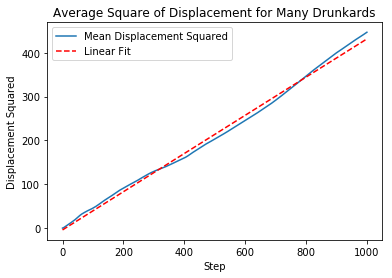

The slope (M) is 0.435325862937
Also, D = M/2.
D is 0.217662931468


In [23]:
#Global parameter
nWalkers = 100

#Function to add more drunk walkers
def avgxsquared():
    """This takes the average value of x^2 for nWalker drunk persons"""
    #Create an array to contain all values
    path = []
    for drinker in range(nWalkers):
        path.append(variance(drunkWalker()))
        #path.append(xsquared(drunkWalker()))
    #Adds the vertical summation of the matrixes
    #sumpath = sum(path)
    #print(len(path[0]))
    sumpath = np.zeros(nSteps+1)
    sumpath = sumpath.tolist()
    #print(len(sumpath))
    for i in path:
        sumpath = np.add(i, sumpath)
    #Divide by number of walkers
    return np.divide(sumpath, nWalkers)

def variance(arr):
    """
    Calculates the variance at each step for a single drunkard
    arr - array of positions
    """
    var = []   #The variance at each step
    #print(len(arr))
    squared = xsquared(arr)
    for i in range(len(arr)):
        avg_x2 = sum(squared[0:i])/(i+1)
        var.append(avg_x2)
    #print(len(var))
    return var

##Plotting
mean_X2 = avgxsquared()
plt.figure(1)
plt.plot(s,mean_X2, label ='Mean Displacement Squared')
plt.title('Average Square of Displacement for Many Drunkards')
plt.xlabel('Step')
plt.ylabel('Displacement Squared')


##Linear Fitting Using the Method of Least Squares

### Define constants for matrix
N = len(mean_X2)
sumx = sum(s)
sumxx = sum(np.multiply(s,s))
sumy = sum(mean_X2)
sumxy = sum(np.multiply(s,mean_X2))
##Solve using Kramer's Equation numerator and denominator
num1 = (N*sumxy) - (sumx * sumy)     #Determinant of top for slope
num2 = (sumy*sumxx) - (sumxy * sumx)     #Determinant of top for Y-intercept
den = (N*sumxx) - (sumx* sumx)       #Determinant of bottom
#Get the slope
M = num1/den
#Get the intercept
B = num2/den
#Find D (diffustve constant)
D = M/2
plt.plot(s, np.add(np.multiply(M,s), B), 'r--', label = 'Linear Fit')
plt.legend()
plt.show()
print('The slope (M) is ' + str(M))
print('Also, D = M/2.')
print('D is ' + str(D))

### Problem 1c

Do the same thing for a drunkard's walk in three dimensions. Define the position of the particle to be a `numpy` array with three components. It may be helpful to define `numpy` arrays with the possible directions one can traverse.

Store these directions in a list, `directions`.  A random step then corresponds to a shift by `sample(directions,1)[0]`. (Test this.)

What is the value of $D$ for the 3D drunkard's walk?

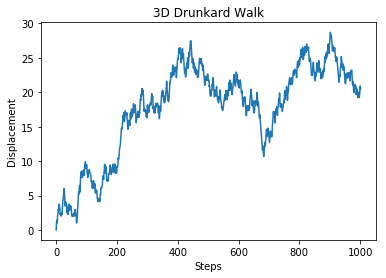

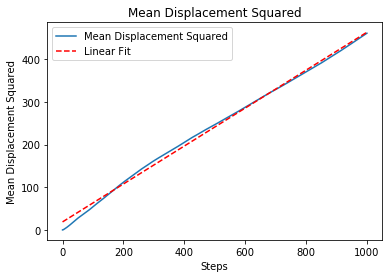

The slope (M) is 0.443890080658
Also, D = M/2.
D is 0.221945040329


In [24]:
from math import sqrt

#Global Parameters
directions = [[0,0,1],[1,0,0],[0,1,0],[0,0,-1],[-1,0,0],[0,-1,0]]
steps = 1000

def norm(vec):
    """
    Return the length of a vector
    """
    square_terms = 0  #Sum of the square terms in the vector
    for element in vec:
        square_terms += (element**2)
        
    return sqrt(square_terms)

def random3dwalk():
    """
    Function to manage the steps of the 3d drunkard; 
    Returns the displacement of the drunk guy
    """
    pos0 = [0,0,0]
    pos = pos0
    disp = [0]
    for i in range(steps):
        randwalk = sample(directions,1)[0]    #Picks 1 element from directions at random
        pos = np.add(pos, randwalk)
        disp.append((norm(pos)))
    #print(len(disp))
    return disp

#Function to add more drunk walkers
def avgxsquared3d():
    """This takes the average value of x^2 for nWalker drunk persons"""
    #Create an array to contain all values
    path = []
    for drinker in range(nWalkers):
        path.append(variance(random3dwalk()))
    #print(path)
    #Adds the vertical summation of the matrixes
    pathh = np.array(path)  #make a numpy array to perform vertical summation
    sumpath = sum(pathh)
    #Divide by number of walkers
    return np.divide(sumpath, nWalkers)

##Linear fitting using method of least squares
### Define constants for matrix
mean_X2 = avgxsquared3d()
N = len(mean_X2)
sumx = sum(s)
sumxx = sum(np.multiply(s,s))
sumy = sum(mean_X2)
sumxy = sum(np.multiply(s,mean_X2))
##Solve using Kramer's Equation numerator and denominator
num1 = (N*sumxy) - (sumx * sumy)     #Determinant of top for slope
num2 = (sumy*sumxx) - (sumxy * sumx)     #Determinant of top for Y-intercept
den = (N*sumxx) - (sumx* sumx)       #Determinant of bottom
#Get the slope
M = num1/den
#Get the intercept
B = num2/den
#Find D (diffustve constant)
D = M/2

##Plotting
#One Drunkard
plt.figure(1)
plt.plot(s, random3dwalk())
plt.title('3D Drunkard Walk')
plt.xlabel('Steps')
plt.ylabel('Displacement')

#Many Drunkards
plt.figure(2)
plt.plot(s, mean_X2, label = 'Mean Displacement Squared')
plt.title('Mean Displacement Squared')
plt.xlabel('Steps')
plt.ylabel('Mean Displacement Squared')

#Plot linear regression line
plt.plot(s, np.add(np.multiply(M,s), B), 'r--', label = 'Linear Fit')
plt.legend()
plt.show()
print('The slope (M) is ' + str(M))
print('Also, D = M/2.')
print('D is ' + str(D))

### Problem 1.x (extra credit)

*This problem has no programming, I suggest working it out on paper and then sketching the proof here, with key steps written out explicitly*

Derive the diffusion equation from the discretized drunkard's walk. For simplicity, work in two dimensions. Let $P(i,j,t)$ be the probability of finding the drunkard at site $(i,j)$ and time $t$. You want to show:

$\displaystyle \frac{\partial P(x,y,t)}{\partial t} = D \nabla^2 P(x,y,t)$

The key to this is the insight that the probability that the drunkard is at position $(i,j)$ at time $t$ is given by the equally weighted average of the probabilities that the drunkard was at one of the adjacent positions. 

Use this insight to re-write $P(i,j,t) - P(i,j,t-1)$ as a sum of terms that reproduces the Laplacian. You remember what the discretized Laplacian looks like, right?

## Problem 2: Brownian Motion

Let's use the 2D drunkard's walk to model Brownian motion. 

### Problem 2a

Imagine a 2D box of length `L=101`. Place a "drunkard" in the middle of the grid. The drunkard moves in one step in any direction (north, east, south, west) each step. If the drunk hits the wall, forbit motion that goes outside of the box. 

Animate the position of the drunkard as a funtion of time for some period of time.

### Problem 2b

Same as problem 2a, but now populate the center of the box with 20 drunkards that each move randomly. For this problem, allow the drunkards to "stack" on top of each other if they overlap.

### Problem 2x (extra credit)

Semi-self-avoiding drunkards. Same as problem 2b, but now prohibit any motion that would cause drunkards to overlap with each other. You'll have to come up with some appropriate initial condition where the drunkards all start close to each other in the center of the box. There may be conditions where a drunkard cannot move.

**Problem 2a Response**


The animation function does not work for me. Even the example posted in the previous homework produced an error when running. Instead of creating an animation, I generated a plot.


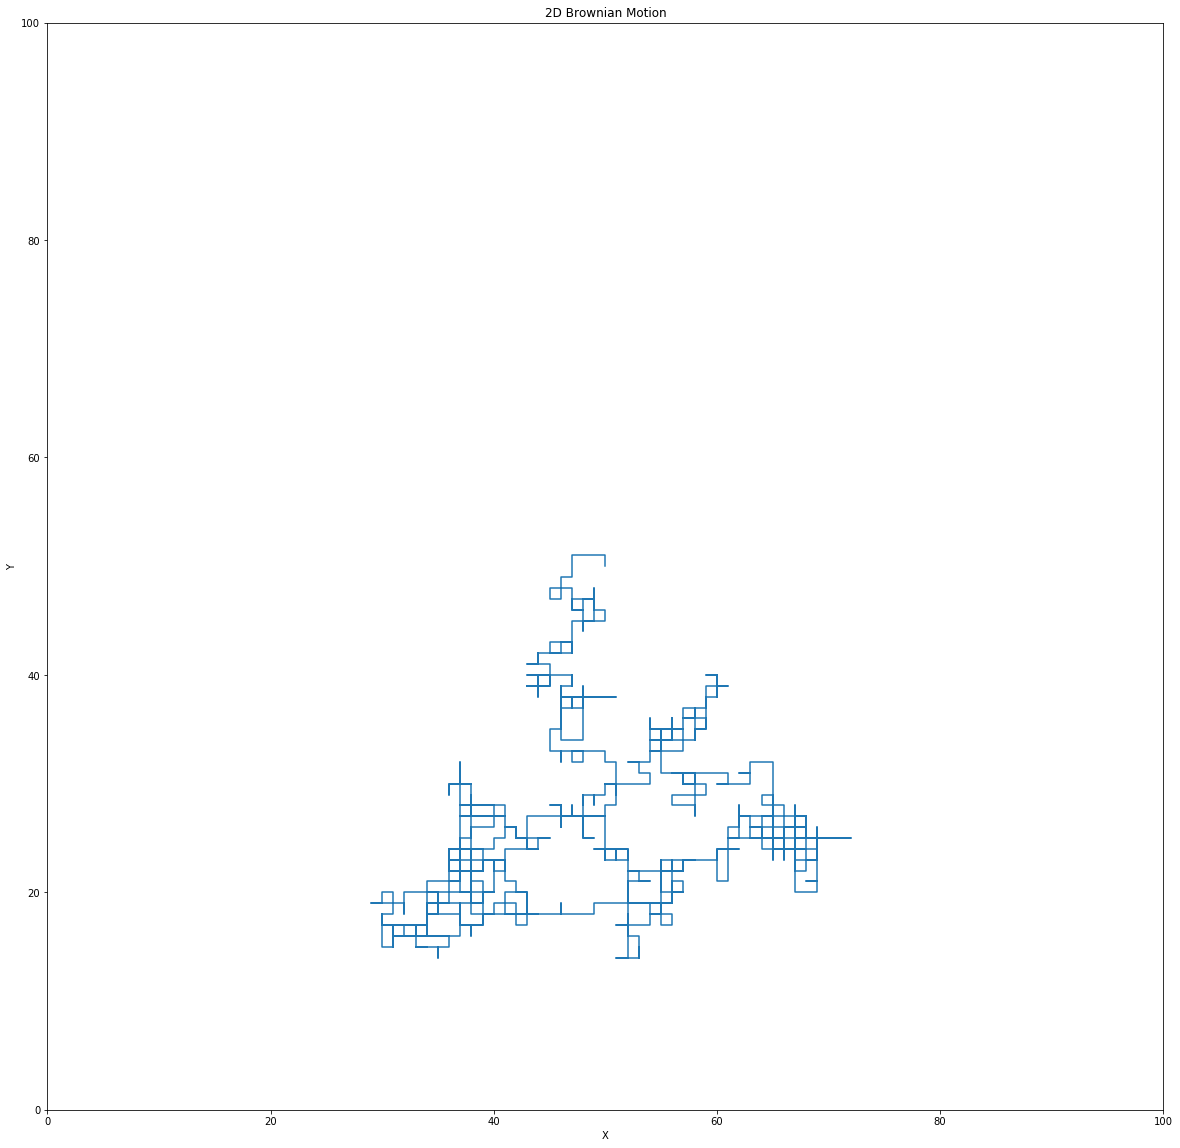

In [25]:
#Import needed classes
from random import *
import numpy as np
import matplotlib.pyplot as plt
##Let's create a 2D drunkard.
nSteps = 1000

def drunkenbrownian():
    """
    Returns a 2D numpy array of all the places the drunk person has been
    eg. Coordinates at a given time
    """
    pos0 = np.array([50,50])
    directions = [[0,1],[0,-1],[1,0],[-1,0]]
    pos = pos0
    path = []
    path.append(pos0)
    for step in range(nSteps):
        rand_walk = sample(directions, 1)[0]
        pos = np.add(pos, rand_walk)
        pos = np.array(pos)
        ##Check boundary conditions
        if (pos[0] < 0 or pos[0]>100) or (pos[1] < 0 or pos[1] > 100):
            pos = np.subtract(pos,rand_walk) #You cannot move outside of the box. Undo the step.
            step = step - 1 #To preserve count
        else:
            path.append(pos)
    return np.array(path)


#Extract x and y positions
movement = drunkenbrownian()
x = movement[:,[0]]   #Take only the first column
y = movement[:,[1]]   #Take only the second column

##Plotting
plt.figure(1, figsize = (20,20))
plt.plot(x,y)
plt.title('2D Brownian Motion')
plt.ylabel('Y')
plt.xlabel('X')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

**Problem 2b Response**

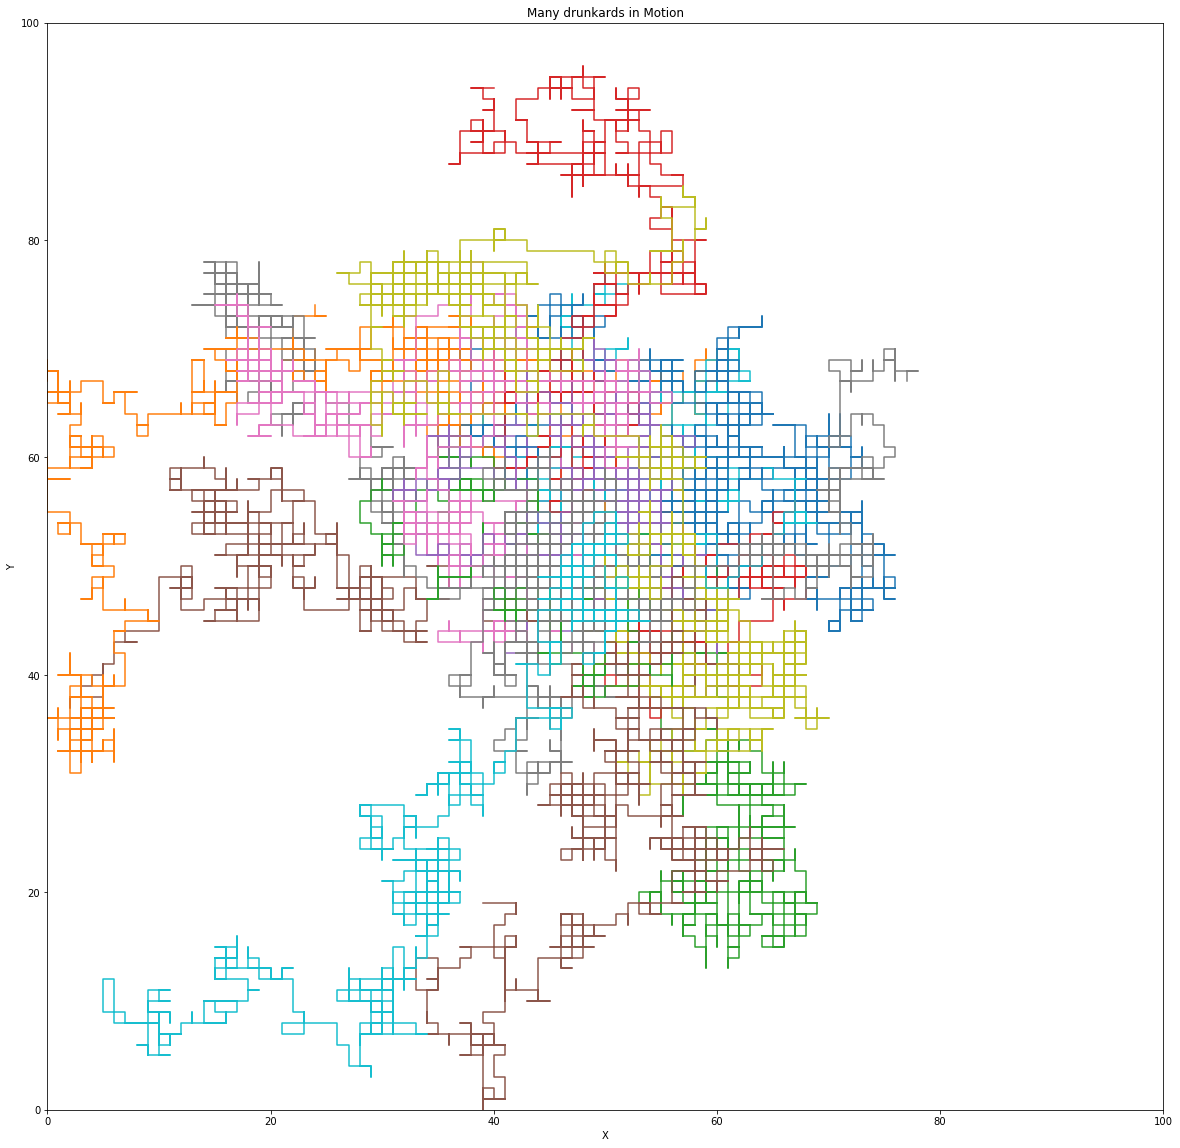

In [26]:
#Global Parameters
num_drunkards = 20

def many2ddrunks():
    coor_of_drunkards = []
    for drunk in range(num_drunkards):
        drinker = drunkenbrownian()
        coor_of_drunkards.append(drinker)
    return coor_of_drunkards

###Plotting
pos_of_drinkers = many2ddrunks()
plt.figure(1, figsize = (20,20))
for d in pos_of_drinkers:
    plt.plot(d[:,[0]],d[:,[1]])
plt.title("Many drunkards in Motion")
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

## Problem 3: Hyperspheres and Monte Carlo

Calculate the volume of a unit $n$-sphere for the cases $n$ = 2,3,4,5,6. Use the **Monte Carlo** "throwing marbles" method where you randomly sample points in an $n$-dimensional unit cube and keep track of how many points fall within the condition

$\sum_i^n x_i^2 < 1$.

Compare to the analytic formulae here: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

### Problem 3x

Plot the estimated hypervolume as a function of number of random samples used, and plot (as a horizontal line) the correct values from the analytic formula. Alternatively, plot the "difference from the true result" as a function of number of samples. 

Comment on how the number of samples required depends on the dimensionality of the hypersphere.

## Problem 3 Response

In [27]:
##Calculate volume of an n-sphere by applying Monte Carlo method
from random import *
from math import pi
n_marbles = 100000

def nspherevol(n):
    n = int(n) #Guarantees that the argument is an integer.
    #Base case: A Oth-dimenisonal sphere always has a volume of one
    if (n==0):
        return 1
    count = 0   #Number of marbles in the n-sphere
    for m in range(n_marbles):
        marble = []
        for dim in range(n):
            marble.append(random())  #Form a random data point in n dimensions.
        if norm(marble) < 1:  #Use the norm formula built in the 3D drunkard example.
            count+=1
    #This 2^n factor accounts for the symmetry of the sphere. eg. Sphere has 8 sectors. Circle has 4 quadrants
    #Each dimension contributes a factor of 2
    #This is because random() only supplies positive numbers from 0 to 1
    return (count/n_marbles)*(2**n) 

print('Monte Carlo Method for Area of Circle: ' + str(nspherevol(2)))
print('Known Area of a Circle of Radius 1: '+ str(pi))
print('MC Method for Sphere: ' + str(nspherevol(3)))
print('Actual Volume of Sphere: ' + str(4/3*pi))

Monte Carlo Method for Area of Circle: 3.13916
Known Area of a Circle of Radius 1: 3.141592653589793
MC Method for Sphere: 4.19592
Actual Volume of Sphere: 4.1887902047863905


## Problem 3 EC Response

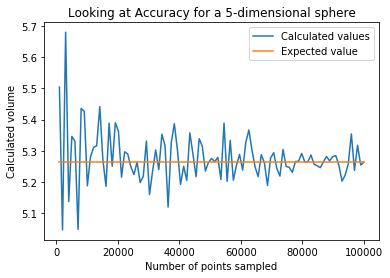

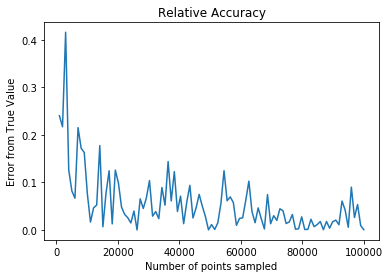

In [28]:
import numpy as np
#For the EC, let's look at a 5 dimensional sphere. n = 5
dim = 5
a = 1000 #Lower bound
b = 100000 #Upper bound
h = 1000   #Step size, must be neat.
marble_range = np.linspace(a,b, (b-a)/h) #Range of sample points
exact_value = 8*(pi**2)/15
values = []
for i in marble_range:
    n_marbles = int(i)
    values.append(nspherevol(dim))
exact = np.linspace(exact_value, exact_value, len(marble_range)) #Create a straight horizontal line
plt.figure(1)
plt.plot(marble_range, values, label = 'Calculated values' )
plt.plot(marble_range, exact, label = 'Expected value')
plt.title('Looking at Accuracy for a ' + str(dim) + '-dimensional sphere')
plt.xlabel('Number of points sampled')
plt.ylabel('Calculated volume')
plt.legend()

plt.figure(2)
plt.plot(marble_range, abs(np.subtract(values, exact)))
plt.title('Relative Accuracy')
plt.xlabel('Number of points sampled')
plt.ylabel('Error from True Value')
plt.show()

The number of samples required depends on how many dimensions there are to cover. The more dimensions there are the more "marbles" needed to uniformly distribute the marble in each dimension.